# Wave propagation (hyperbolic PDE)

## libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib import animation
from IPython.display import HTML

## initialization

In [2]:
COURANT=0.5

X_max = 150
T_max = 300
X_min = - X_max
T_min = 0
AMP = 10
WIDTH = 0.1

NUMBER_X = 100
NUMBER_T = int((T_max - T_min) * NUMBER_X / COURANT / (X_max - X_min))

In [3]:
X_RANGE = np.linspace(X_min, X_max, NUMBER_X)
T_RANGE = np.linspace(T_min, T_max, NUMBER_T)

X_STEP = X_RANGE[1] - X_RANGE[0]
T_STEP = T_RANGE[1] - T_RANGE[0]

In [4]:
X, T = np.meshgrid(X_RANGE, T_RANGE, indexing='ij')

In [5]:
source = np.exp(- X_RANGE ** 2 / 2 / AMP ** 2)
E = np.zeros_like(X)
H = np.zeros_like(X)
sigma = np.zeros_like(X_RANGE)

E[:, 0] = source

In [6]:
def wave_in_limited_space(E):
    for x in range(len(X_RANGE) - 1):
        E[x, 1] = E[x, 0] + (E[x+1, 0] - 2 * E[x, 0] + E[x-1, 0])

    for t in range(1, len(T_RANGE) - 1):
        for x in range(len(X_RANGE) - 1):
            E[x, t+1] = 2 * E[x, t] - E[x, t-1] + (E[x+1, t] - 2 * E[x, t] + E[x-1, t]) * COURANT ** 2
    return E

def wave_in_free_space(E, H, sigma):
    mask_left  = X_RANGE < X_min + WIDTH
    mask_right = X_RANGE > X_max - WIDTH

    sigma[mask_left]  = AMP * ((X_RANGE[mask_left]  + X_max - WIDTH) / WIDTH) **2
    sigma[mask_right] = AMP * ((X_RANGE[mask_right] + X_min + WIDTH) / WIDTH) **2

    return E

## main procedure

In [7]:
E = wave_in_limited_space(E)

## animated plot

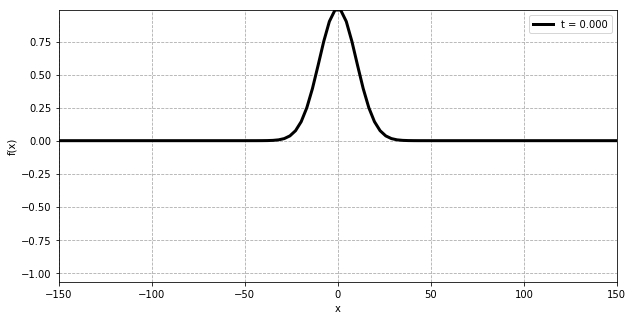

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis([X_min, X_max, E.min(), E.max()])

l1, = ax.plot(X_RANGE, E[:, NUMBER_T - 1], lw=3, color='black', label=NUMBER_T)
ax.grid(c='#aaaaaa', ls='--')

ax.set_ylabel("f(x)")
ax.set_xlabel("x")

def animate(i):
    l1.set_data(X_RANGE, E[:, i])
    l1.set_label('t = ' + '%.3f' % (i * T_STEP))

    legend = plt.legend(loc='upper right')
    return l1, legend

ani = animation.FuncAnimation(fig, animate, frames= np.arange(0, NUMBER_T, 1), interval=20)

#ani.save("solution.mp4")
HTML(ani.to_jshtml())